In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=Warning)

from IPython.display import Audio
sound_file = '/Users/soso/Downloads/bell.mp3'
sound_file_1 = '/Users/soso/Downloads/Batterie de blague.mp3.mp3'

In [2]:
def Graph(data, x,y,string):  
    a = data.value_counts()
    a = pd.DataFrame(data=a)
    a = a.rename(columns={0 : 'Count'})
    a = a.reset_index()
    plt.figure(figsize=(10, 10))
    plt.title(string, fontsize=30)
    ax = sns.barplot(x=x, y=y, data=a, orient='h')
    plt.xticks(fontsize=20, rotation=30)
    plt.yticks(fontsize=20, rotation=30)
    plt.title(string, fontsize=35)
    return plt

def GraphNum(data, x,y,string):  
    plt.figure(figsize=(10, 10))
    ax = sns.barplot(x=x, y=y, data=data, orient='h')
    plt.title(string, fontsize=30)
    plt.xticks(fontsize=20, rotation=30)
    plt.yticks(fontsize=20, rotation=30)
    return plt

def GraphNumv2(data, x,y,string):  
    plot = data.plot.pie(subplots=True, figsize=(10,10), fontsize=15)
    plt.title(x, fontsize=30)
    plt.xticks(fontsize=20, rotation=30)
    plt.yticks(fontsize=20, rotation=30)
    return plt

   

In [3]:
%store -r mProduct
%store -r mOrder
%store -r mCard
%store -r mReview
%store -r mPayment
%store -r mAdress
%store -r mSeller
%store -r mCustomer


In [4]:
print("mOrder------>", mOrder.shape ,"mOrder------>", mOrder.columns)
print("                    ")
print("mCustomer------>", mCustomer.shape ,"mCustomer------>", mCustomer.columns)
print("                    ")
print("mPayment------>", mPayment.shape ,"mPayment------>", mPayment.columns)
print("                    ")
print("mProduct------>", mProduct.shape ,"mProduct------>", mProduct.columns)
print("                    ")
print("mCard------>", mCard.shape ,"mCard------>", mCard.columns)
print("                    ")
print("mSeller------>", mSeller.shape ,"mSeller------>", mSeller.columns)


mOrder------> (99441, 8) mOrder------> Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
                    
mCustomer------> (99163, 7) mCustomer------> Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'cust_geo_lat', 'cust_geo_lng'],
      dtype='object')
                    
mPayment------> (103886, 5) mPayment------> Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
                    
mProduct------> (32951, 9) mProduct------> Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='obje

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

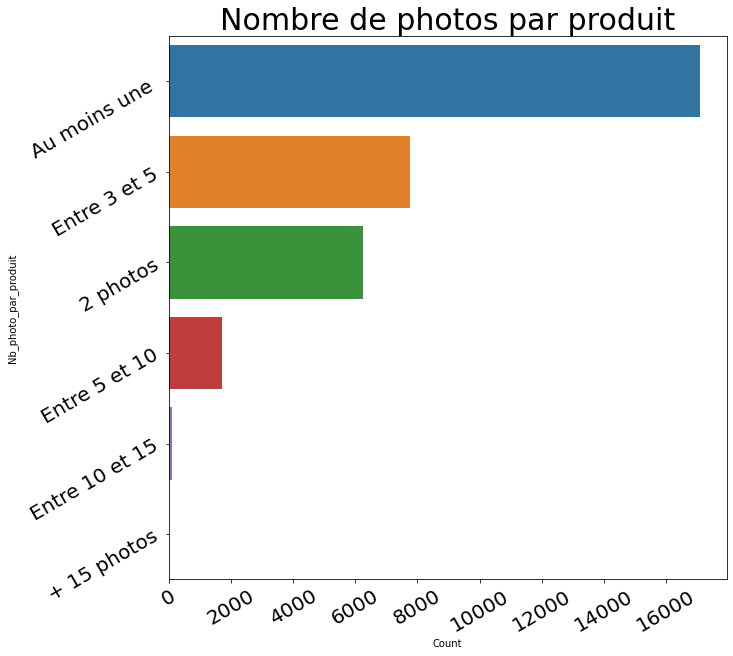

In [5]:



m01_A = [
        (mProduct['product_photos_qty'] <= 1),
        (mProduct['product_photos_qty'] >= 2)     & (mProduct['product_photos_qty'] <= 2) ,
        (mProduct['product_photos_qty'] >= 3)     & (mProduct['product_photos_qty'] <= 5) ,
        (mProduct['product_photos_qty'] >= 5)    & (mProduct['product_photos_qty'] <= 10) ,
        (mProduct['product_photos_qty'] >= 10)    & (mProduct['product_photos_qty'] <= 15) ,
        (mProduct['product_photos_qty'] >= 15) ]

m01_B = [0,1,2,3,4,5]

m01_C = np.select(m01_A, m01_B)
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C = m01_C.reset_index()
m01_C = m01_C.rename(columns={0 : 'Nb_photo_par_produit'}) 
m01_C
m01_C["Nb_photo_par_produit"].replace(0," Au moins une ", inplace=True)
m01_C["Nb_photo_par_produit"].replace(1," 2 photos", inplace=True)
m01_C["Nb_photo_par_produit"].replace(2,"Entre 3 et 5", inplace=True)
m01_C["Nb_photo_par_produit"].replace(3,"Entre 5 et 10", inplace=True)
m01_C["Nb_photo_par_produit"].replace(4,"Entre 10 et 15", inplace=True)
m01_C["Nb_photo_par_produit"].replace(5," + 15 photos", inplace=True)

#1 graph
GraphNum(m01_C,"Count", "Nb_photo_par_produit", "Nombre de photos par produit" )


<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

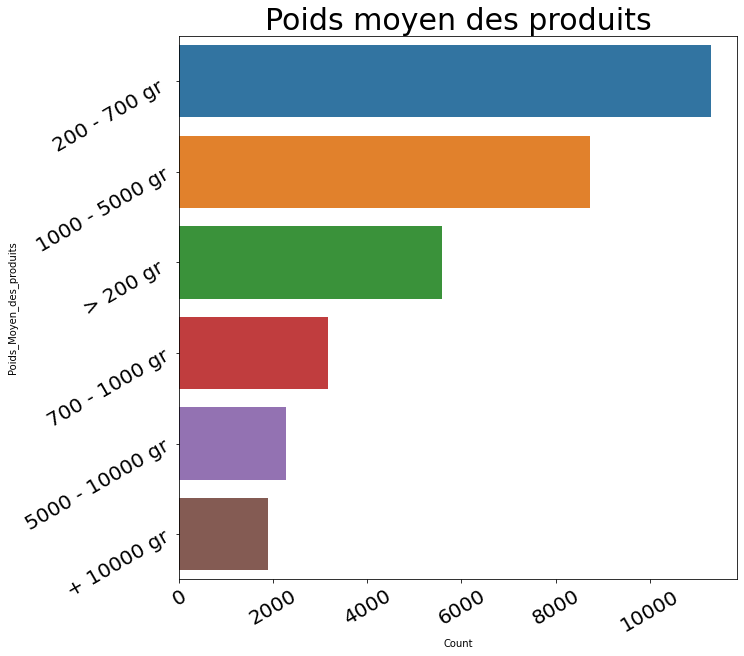

In [6]:
# 2 - product_weight_g
m01_A = [
        (mProduct['product_weight_g'] <= 200),
        (mProduct['product_weight_g'] >= 200)     & (mProduct['product_weight_g'] <= 700) ,
        (mProduct['product_weight_g'] >= 700)     & (mProduct['product_weight_g'] <= 1000) ,
        (mProduct['product_weight_g'] >= 1000)    & (mProduct['product_weight_g'] <= 5000) ,
        (mProduct['product_weight_g'] >= 5000)    & (mProduct['product_weight_g'] <= 10000) ,
        (mProduct['product_weight_g'] >= 10000) ]

m01_B = [0,1,2,3,4,5]

m01_C = np.select(m01_A, m01_B)
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C = m01_C.reset_index()
m01_C = m01_C.rename(columns={0 : 'Poids_Moyen_des_produits'}) 
m01_C
m01_C["Poids_Moyen_des_produits"].replace(0,"> 200 gr ", inplace=True)
m01_C["Poids_Moyen_des_produits"].replace(1," 200 - 700 gr ", inplace=True)
m01_C["Poids_Moyen_des_produits"].replace(2,"700 - 1000 gr", inplace=True)
m01_C["Poids_Moyen_des_produits"].replace(3,"1000 - 5000 gr", inplace=True)
m01_C["Poids_Moyen_des_produits"].replace(4,"5000 - 10000 gr", inplace=True)
m01_C["Poids_Moyen_des_produits"].replace(5," + 10000 gr", inplace=True)

#2
GraphNum(m01_C,"Count", "Poids_Moyen_des_produits", "Poids moyen des produits")





(99441, 8)
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

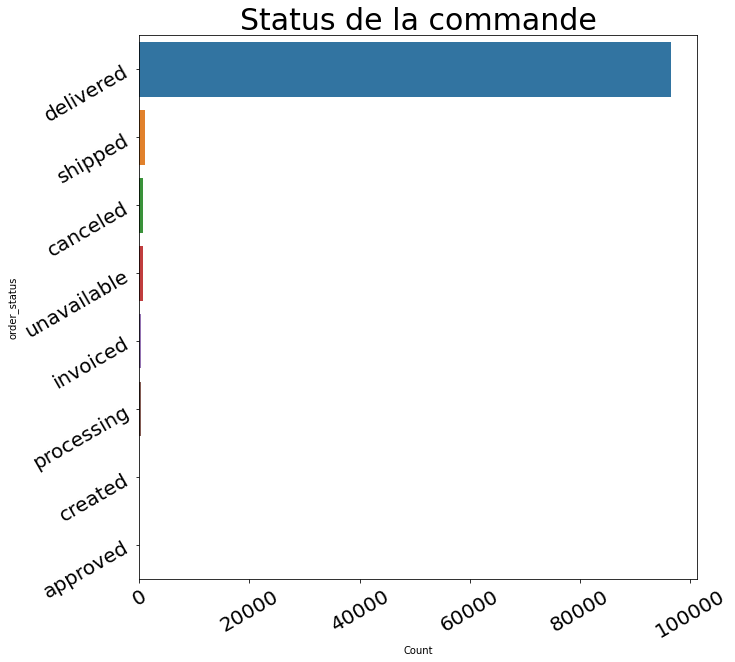

In [7]:
print(mOrder.shape)
print(mOrder.columns)

# 3 - order_status
m01_C = mOrder["order_status"].value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={"order_status" : 'Count'}) 
m01_C = m01_C.reset_index()
m01_C = m01_C.rename(columns={"index" : 'order_status'}) 

GraphNum(m01_C,"Count", "order_status", "Status de la commande" )

(112650, 7)
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

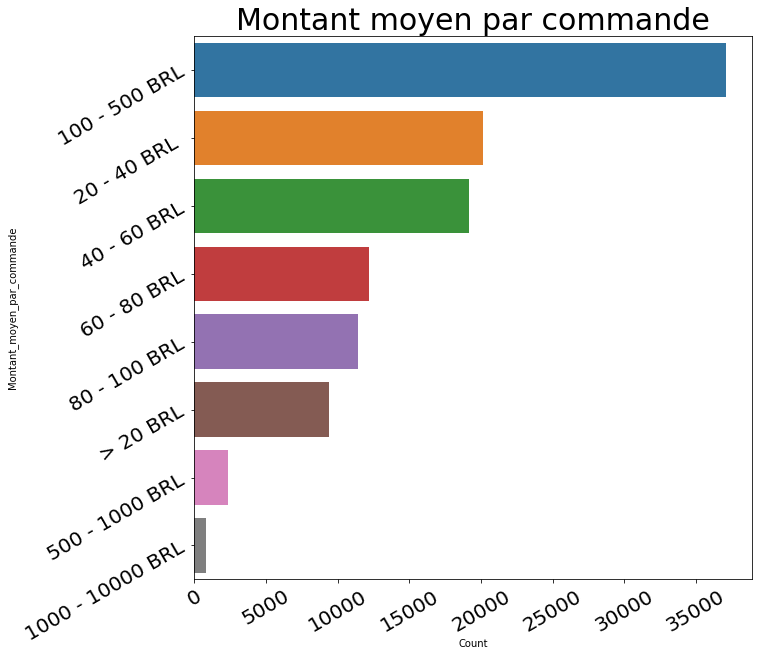

In [8]:
print(mCard.shape)
print(mCard.columns)

# 4 - price moy - Panier
m03 = pd.DataFrame(data=mCard["price"])

m01_A = [
        (m03['price'] <= 20),
        (m03['price'] >= 20)     & (m03['price'] <= 40),
        (m03['price'] >= 40)     & (m03['price'] <= 60) ,
        (m03['price'] >= 60)     & (m03['price'] <= 80) ,
        (m03['price'] >= 80)     & (m03['price'] <= 100) ,
        (m03['price'] >= 100)    & (m03['price'] <= 500) ,
        (m03['price'] >= 500)    & (m03['price'] <= 1000) ,
        (m03['price'] >= 1000)   & (m03['price'] <= 10000) ,
        (m03['price'] >= 10000) ]

m01_B = [0,1,2,3,4,5,6,7,8]

m01_C = np.select(m01_A, m01_B)
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C = m01_C.reset_index()
m01_C = m01_C.rename(columns={0 : 'Montant_moyen_par_commande'}) 
m01_C["Montant_moyen_par_commande"].replace(0,"> 20 BRL", inplace=True)
m01_C["Montant_moyen_par_commande"].replace(1,"20 - 40 BRL ", inplace=True)
m01_C["Montant_moyen_par_commande"].replace(2,"40 - 60 BRL", inplace=True)
m01_C["Montant_moyen_par_commande"].replace(3,"60 - 80 BRL", inplace=True)
m01_C["Montant_moyen_par_commande"].replace(4,"80 - 100 BRL", inplace=True)
m01_C["Montant_moyen_par_commande"].replace(5,"100 - 500 BRL", inplace=True)
m01_C["Montant_moyen_par_commande"].replace(6,"500 - 1000 BRL", inplace=True)
m01_C["Montant_moyen_par_commande"].replace(7,"1000 - 10000 BRL", inplace=True)
m01_C["Montant_moyen_par_commande"].replace(8," + 10000 BRL", inplace=True)

GraphNum(m01_C,"Count", "Montant_moyen_par_commande", "Montant moyen par commande"  )


<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

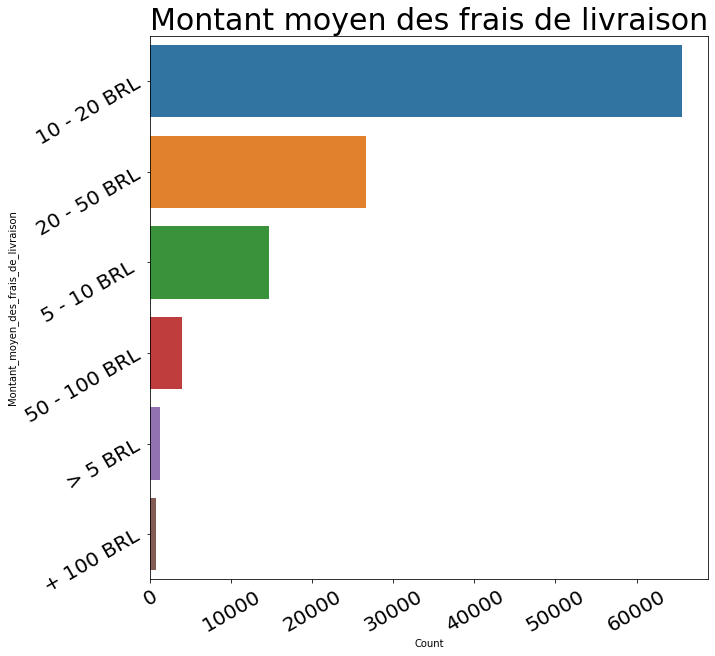

In [9]:
# 5 - freight_value moy - Panier

m03 = pd.DataFrame(data=mCard["freight_value"])

m01_A = [
        (m03['freight_value'] <= 5),
        (m03['freight_value'] >= 5)     & (m03['freight_value'] <= 10) ,
        (m03['freight_value'] >= 10)    & (m03['freight_value'] <= 20) ,
        (m03['freight_value'] >= 20)    & (m03['freight_value'] <= 50) ,
        (m03['freight_value'] >= 50)    & (m03['freight_value'] <= 100) ,
        (m03['freight_value'] >= 100) ]

m01_B = [0,1,2,3,4,5]

m01_C = np.select(m01_A, m01_B)
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C = m01_C.reset_index()
m01_C = m01_C.rename(columns={0 : 'Montant_moyen_des_frais_de_livraison'}) 
m01_C
m01_C["Montant_moyen_des_frais_de_livraison"].replace(0,"> 5 BRL", inplace=True)
m01_C["Montant_moyen_des_frais_de_livraison"].replace(1,"5 - 10 BRL ", inplace=True)
m01_C["Montant_moyen_des_frais_de_livraison"].replace(2,"10 - 20 BRL", inplace=True)
m01_C["Montant_moyen_des_frais_de_livraison"].replace(3,"20 - 50 BRL", inplace=True)
m01_C["Montant_moyen_des_frais_de_livraison"].replace(4,"50 - 100 BRL", inplace=True)
m01_C["Montant_moyen_des_frais_de_livraison"].replace(5," + 100 BRL", inplace=True)

GraphNum(m01_C,"Count", "Montant_moyen_des_frais_de_livraison", "Montant moyen des frais de livraison"  )


(100000, 7)
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

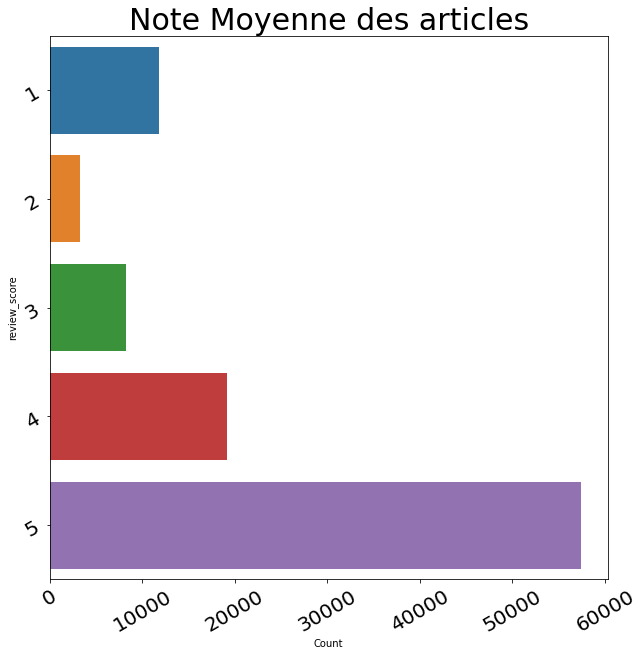

In [10]:
print(mReview.shape)
print(mReview.columns)

#6

m01_C = pd.DataFrame(data=mReview["review_score"])
m01_C["review_score"] = round(m01_C["review_score"] )
m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C = m01_C.reset_index()
m01_C


GraphNum(m01_C,"Count", "review_score", "Note Moyenne des articles" )

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

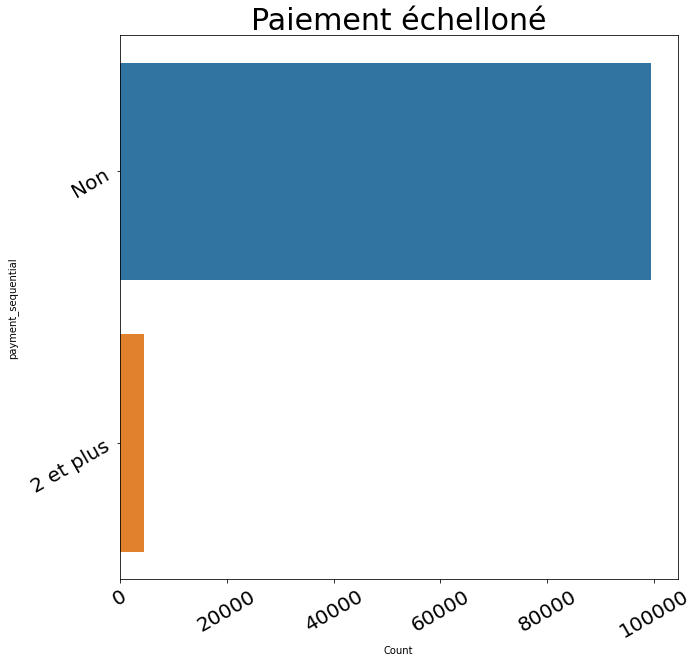

In [11]:
#7 - Type payment_sequential
    
mPayment_ = pd.DataFrame(data=mPayment["payment_sequential"])
mPayment_

m01_A = [
        (mPayment_['payment_sequential'] <= 1),
        (mPayment_['payment_sequential'] >= 2) ]

m01_B = [0,1]

m01_C = np.select(m01_A, m01_B)
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C = m01_C.reset_index()
m01_C = m01_C.rename(columns={0 : 'payment_sequential'}) 

m01_C

m01_C["payment_sequential"].replace(0,"Non", inplace=True)
m01_C["payment_sequential"].replace(1," 2 et plus", inplace=True)


GraphNum(m01_C,"Count", "payment_sequential", "Paiement échelloné")



,payment_installments,Count
0,Non,52548
1,2 fois,12413
2,3 fois,10461
3,4 fois,7098
4,9,5669
5,5 fois,5239
6,8 fois,4268
7,6 fois,3920
8,7 fois,1626
9,9 et plus,644


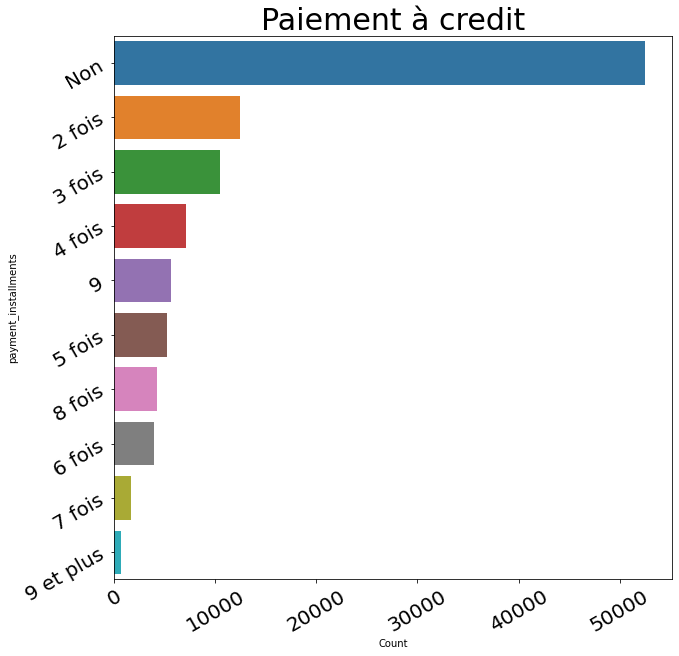

In [12]:
# 8 - Type payment_installments


mPayment__ = pd.DataFrame(data=mPayment["payment_installments"])

m01_A = [
        (mPayment__['payment_installments'] <= 1),
        (mPayment__['payment_installments'] >= 1)    & (mPayment__['payment_installments'] <= 2) ,
        (mPayment__['payment_installments'] >= 2)    & (mPayment__['payment_installments'] <= 3) ,
        (mPayment__['payment_installments'] >= 3)    & (mPayment__['payment_installments'] <= 4) ,
        (mPayment__['payment_installments'] >= 4)    & (mPayment__['payment_installments'] <= 5) ,
        (mPayment__['payment_installments'] >= 5)    & (mPayment__['payment_installments'] <= 6) ,
        (mPayment__['payment_installments'] >= 6)    & (mPayment__['payment_installments'] <= 7) ,
        (mPayment__['payment_installments'] >= 7)    & (mPayment__['payment_installments'] <= 8) ,
        (mPayment__['payment_installments'] >= 8)    & (mPayment__['payment_installments'] <= 9) ,
        (mPayment__['payment_installments'] >= 9) ]

m01_B = [0,1,2,3,4,5,6,7,8,9]

m01_C = np.select(m01_A, m01_B)
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C = m01_C.reset_index()
m01_C = m01_C.rename(columns={0 : 'payment_installments'}) 

m01_C["payment_installments"].replace(0,"Non", inplace=True)
m01_C["payment_installments"].replace(1,"2 fois", inplace=True)
m01_C["payment_installments"].replace(2,"3 fois", inplace=True)
m01_C["payment_installments"].replace(3,"4 fois", inplace=True)
m01_C["payment_installments"].replace(4,"5 fois", inplace=True)
m01_C["payment_installments"].replace(5,"6 fois", inplace=True)
m01_C["payment_installments"].replace(6,"7 fois", inplace=True)
m01_C["payment_installments"].replace(7,"8 fois", inplace=True)
m01_C["payment_installments"].replace(8,"9 et plus", inplace=True)

GraphNum(m01_C,"Count", "payment_installments", "Paiement à credit" )
m01_C


<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

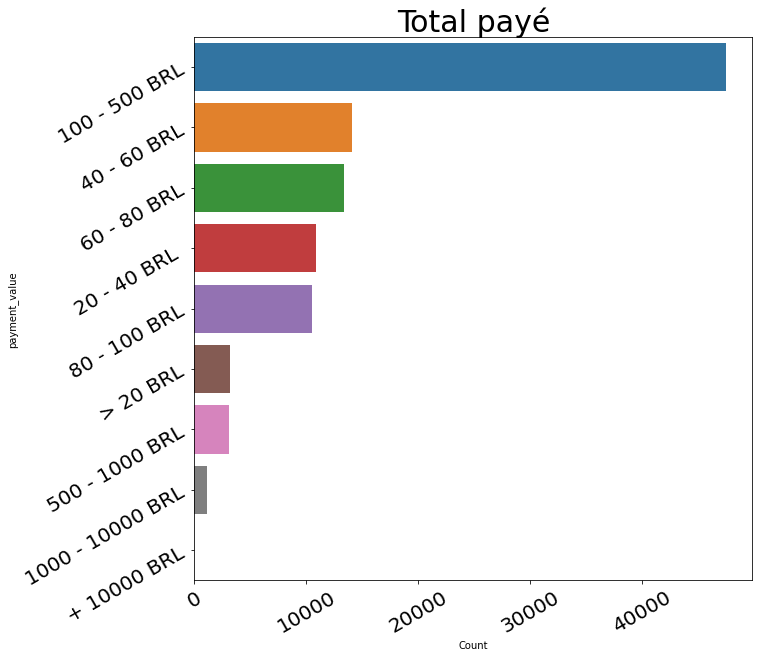

In [13]:
# 9 - Moy payment_value

mPayment["payment_value"].describe()

m03 = pd.DataFrame(data=mPayment["payment_value"])

m01_A = [(m03['payment_value'] <= 20),
        (m03['payment_value'] >= 20)     & (m03['payment_value'] <= 40),
        (m03['payment_value'] >= 40)     & (m03['payment_value'] <= 60) ,
        (m03['payment_value'] >= 60)     & (m03['payment_value'] <= 80) ,
        (m03['payment_value'] >= 80)     & (m03['payment_value'] <= 100) ,
        (m03['payment_value'] >= 100)    & (m03['payment_value'] <= 500) ,
        (m03['payment_value'] >= 500)    & (m03['payment_value'] <= 1000) ,
        (m03['payment_value'] >= 1000)   & (m03['payment_value'] <= 10000) ,
        (m03['payment_value'] >= 10000) ]

m01_B = [0,1,2,3,4,5,6,7,8]

m01_C = np.select(m01_A, m01_B)
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C = m01_C.reset_index()
m01_C = m01_C.rename(columns={0 : 'payment_value'}) 
m01_C
m01_C["payment_value"].replace(0,"> 20 BRL", inplace=True)
m01_C["payment_value"].replace(1,"20 - 40 BRL ", inplace=True)
m01_C["payment_value"].replace(2,"40 - 60 BRL", inplace=True)
m01_C["payment_value"].replace(3,"60 - 80 BRL", inplace=True)
m01_C["payment_value"].replace(4,"80 - 100 BRL", inplace=True)
m01_C["payment_value"].replace(5,"100 - 500 BRL", inplace=True)
m01_C["payment_value"].replace(6,"500 - 1000 BRL", inplace=True)
m01_C["payment_value"].replace(7,"1000 - 10000 BRL", inplace=True)
m01_C["payment_value"].replace(8," + 10000 BRL", inplace=True)


#print(m01_C.describe())

GraphNum(m01_C,"Count", "payment_value", "Total payé")


<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

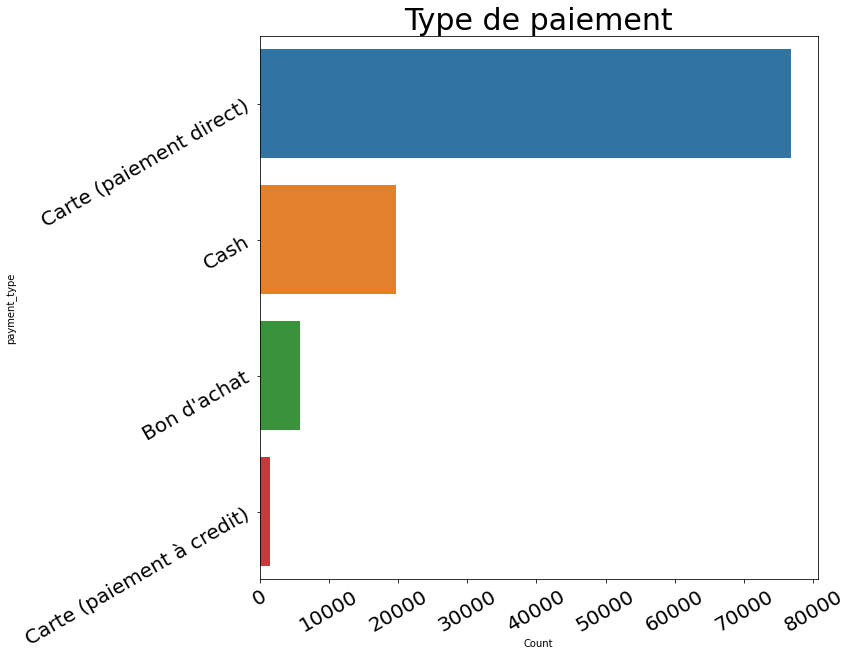

In [14]:
# 10 - Type payment_type

m01_C = pd.DataFrame(data=mPayment["payment_type"])
m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C = m01_C.reset_index()

m01_C["payment_type"].replace("credit_card","Carte (paiement direct)", inplace=True)
m01_C["payment_type"].replace("boleto","Cash", inplace=True)
m01_C["payment_type"].replace("voucher","Bon d'achat", inplace=True)
m01_C["payment_type"].replace("debit_card","Carte (paiement à credit)", inplace=True)
m01_C.drop(4, inplace=True)

m01_C
GraphNum(m01_C,"Count", "payment_type", "Type de paiement" )



<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

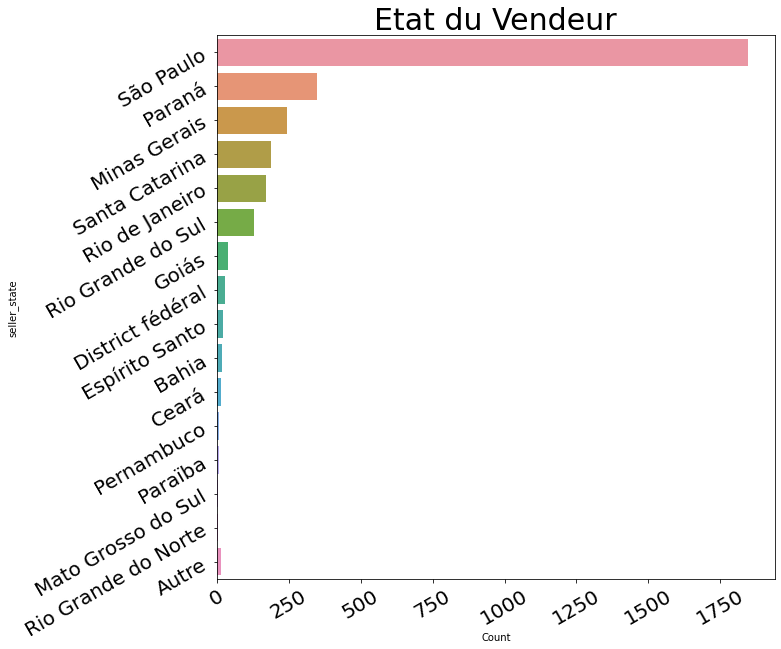

In [15]:
# 11 - Sell - geolocation_state

m01_C = pd.DataFrame(data=mSeller["seller_state"])



m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.reset_index()


m01_C.replace("AC", "Acre", inplace=True)
m01_C.replace("AL", "Alagoas", inplace=True)
m01_C.replace("AP", "Amapá", inplace=True)
m01_C.replace("AM", "Amazonas", inplace=True)
m01_C.replace("BA", "Bahia", inplace=True)
m01_C.replace("CE", "Ceará", inplace=True)
m01_C.replace("DF", "District fédéral", inplace=True)
m01_C.replace("ES", "Espírito Santo", inplace=True)
m01_C.replace("GO", "Goiás", inplace=True)
m01_C.replace("MA", "Maranhão", inplace=True)
m01_C.replace("MT", "Mato Grosso", inplace=True)
m01_C.replace("MS", "Mato Grosso do Sul", inplace=True)
m01_C.replace("MG", "Minas Gerais", inplace=True)
m01_C.replace("PA", "Pará", inplace=True)
m01_C.replace("PB", "Paraïba", inplace=True)
m01_C.replace("PR", "Paraná", inplace=True)
m01_C.replace("PE", "Pernambuco", inplace=True)
m01_C.replace("PI", "Piauí", inplace=True)
m01_C.replace("RJ", "Rio de Janeiro", inplace=True)
m01_C.replace("RN", "Rio Grande do Norte", inplace=True)
m01_C.replace("RS", "Rio Grande do Sul", inplace=True)
m01_C.replace("RO", "Rondônia", inplace=True)
m01_C.replace("RR", "Roraima", inplace=True)
m01_C.replace("SC", "Santa Catarina", inplace=True)
m01_C.replace("SP", "São Paulo", inplace=True)
m01_C.replace("SE", "Sergipe", inplace=True)
m01_C.replace("TO", "Tocantins", inplace=True) 
#
#
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C["seller_state"].replace("Mato Grosso","Autre", inplace=True)
#
m01_C["Count"].replace(4,13, inplace=True)
#m01_C
for i in range (16,23) :
    m01_C.drop(i, inplace=True)
m01_C   
#    
GraphNum(m01_C,"Count", "seller_state", "Etat du Vendeur" )

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

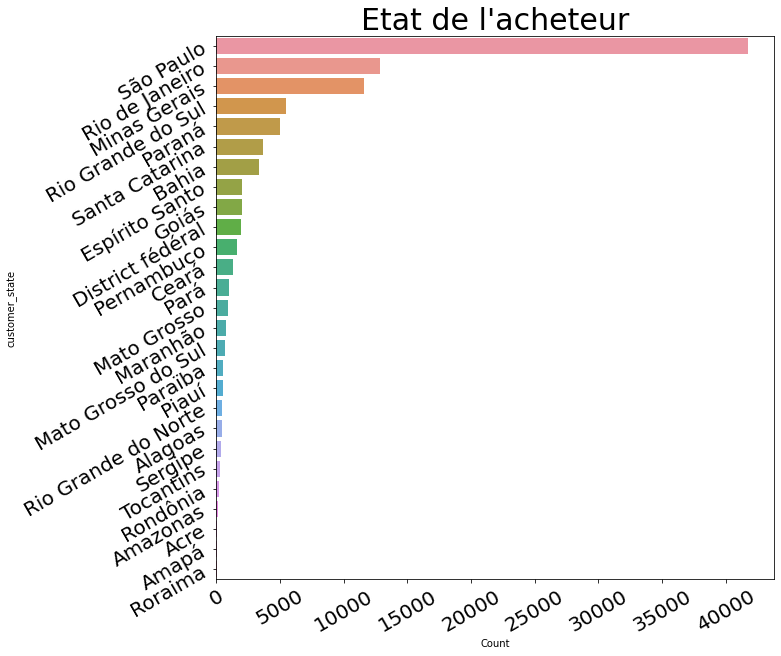

In [16]:
# 12 - Sell - geolocation_state

m01_C = pd.DataFrame(data=mCustomer["customer_state"])
m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C = m01_C.reset_index()

m01_C.replace("AC", "Acre", inplace=True)
m01_C.replace("AL", "Alagoas", inplace=True)
m01_C.replace("AP", "Amapá", inplace=True)
m01_C.replace("AM", "Amazonas", inplace=True)
m01_C.replace("BA", "Bahia", inplace=True)
m01_C.replace("CE", "Ceará", inplace=True)
m01_C.replace("DF", "District fédéral", inplace=True)
m01_C.replace("ES", "Espírito Santo", inplace=True)
m01_C.replace("GO", "Goiás", inplace=True)
m01_C.replace("MA", "Maranhão", inplace=True)
m01_C.replace("MT", "Mato Grosso", inplace=True)
m01_C.replace("MS", "Mato Grosso do Sul", inplace=True)
m01_C.replace("MG", "Minas Gerais", inplace=True)
m01_C.replace("PA", "Pará", inplace=True)
m01_C.replace("PB", "Paraïba", inplace=True)
m01_C.replace("PR", "Paraná", inplace=True)
m01_C.replace("PE", "Pernambuco", inplace=True)
m01_C.replace("PI", "Piauí", inplace=True)
m01_C.replace("RJ", "Rio de Janeiro", inplace=True)
m01_C.replace("RN", "Rio Grande do Norte", inplace=True)
m01_C.replace("RS", "Rio Grande do Sul", inplace=True)
m01_C.replace("RO", "Rondônia", inplace=True)
m01_C.replace("RR", "Roraima", inplace=True)
m01_C.replace("SC", "Santa Catarina", inplace=True)
m01_C.replace("SP", "São Paulo", inplace=True)
m01_C.replace("SE", "Sergipe", inplace=True)
m01_C.replace("TO", "Tocantins", inplace=True) 


#m01_C = pd.DataFrame(data=mSeller["seller_state"])
#m01_C = m01_C.value_counts()
#m01_C = pd.DataFrame(data=m01_C)
#m01_C = m01_C.rename(columns={0 : 'Count'}) 
#m01_C = m01_C.reset_index()
#m01_C["seller_state"].replace("PB","Autre", inplace=True)
#m01_C["Count"].replace(6,29, inplace=True)
m01_C

#print(6+5+5+4+2+2+1+1+1+1+1)
#for i in range (13,23) :
#    m01_C.drop(i, inplace=True)
    
GraphNum(m01_C,"Count", "customer_state", "Etat de l'acheteur" )

In [17]:
#Préparation des données
mOTP = mOrder["order_purchase_timestamp"]
new = mOTP.str.split(" ", n = 1, expand = True)
mOTP = new.rename(columns={0 : 'Date', 1 : 'Hour'})
mOTP["Hour"] = mOTP["Hour"].str.split(":", n = 1, expand = True)
mOTP["Date"] = mOTP["Date"].astype('datetime64[ns]')
mOTP['day_of_week'] = mOTP['Date'].dt.day_name()
mOTP.drop('Date', inplace=True, axis=1)
mOTP1 = mOTP.copy()

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

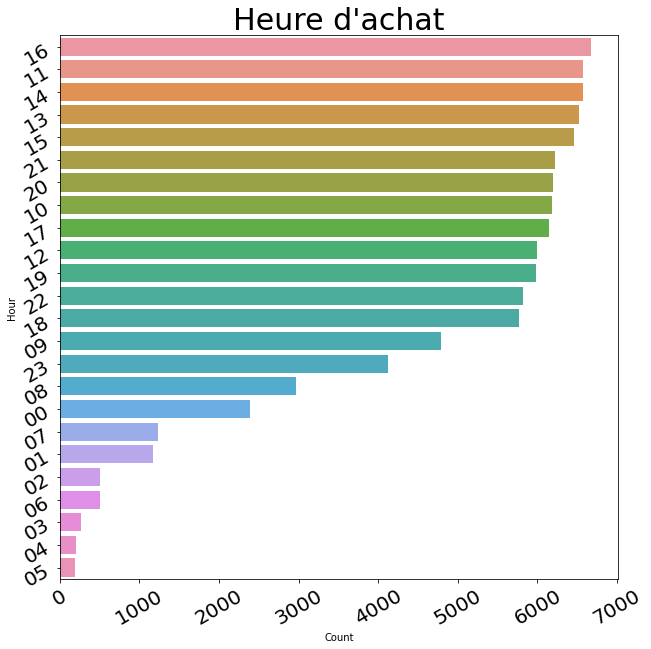

In [18]:
#13 - Hour

m01_C = pd.DataFrame(data=mOTP["Hour"])
m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C = m01_C.reset_index()
mHour = m01_C.copy()
GraphNum(m01_C,"Count", "Hour", "Heure d'achat" )


testNuit---- 0    4346
dtype: int64
testFinNuit---- 0    2127
dtype: int64
testMatin---- 0    20507
dtype: int64
testDebutAprem---- 0    25536
dtype: int64
testFinAprem---- 0    24576
dtype: int64
testDebutAprem---- 0    22349
dtype: int64


<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

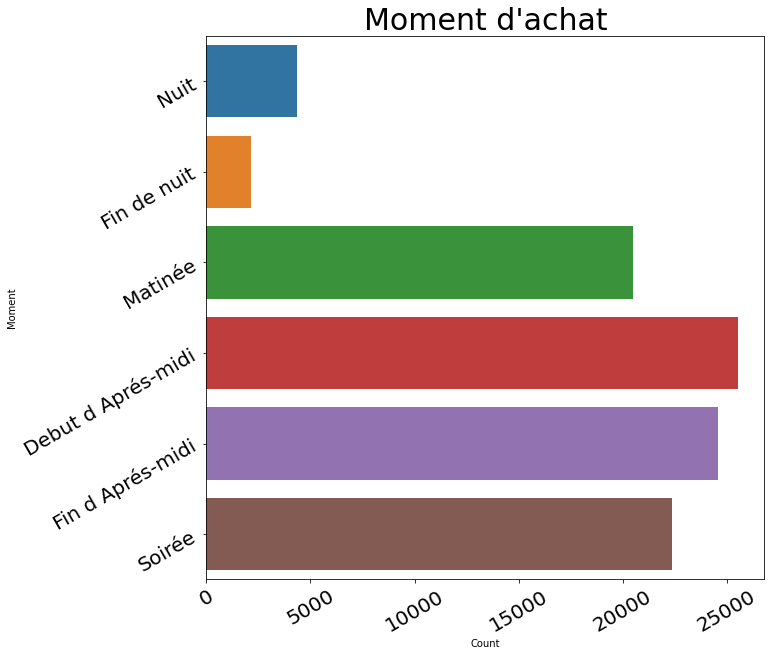

In [19]:
#13 - Hour

m01_ = pd.DataFrame(data=mOTP1["Hour"])
m01_ = m01_.value_counts()
m01_ = pd.DataFrame(data=m01_)
#m01_ = m01_.rename(columns={0 : 'Count'}) 
#m01_ = m01_.reset_index()
m01_ =  m01_.sort_values(by=['Hour'], ascending=True)
#mHour = m01_.copy()
#GraphNum(m01_C,"Count", "Hour", "Heure d'achat" )
#m01_ = m01_.T
Nuit = m01_.loc[["00","01","02","03"]].sum()
print("testNuit----" , Nuit ) 

Fin_de_la_nuit= m01_.loc[["04","05","06","07"]].sum()
print("testFinNuit----" , Fin_de_la_nuit ) 

Matin = m01_.loc[["08","09","10","11"]].sum()
print("testMatin----" , Matin ) 

Debut_d_Aprés_Midi = m01_.loc[["12","13","14","15"]].sum()
print("testDebutAprem----" , Debut_d_Aprés_Midi )

Fin_d_Aprés_Midi = m01_.loc[["16","17","18","19"]].sum()
print("testFinAprem----" , Fin_d_Aprés_Midi )

Soirée = m01_.loc[["20","21","22","23"]].sum()
print("testDebutAprem----" , Soirée )


data = {'Moment': ['Nuit', 'Fin de nuit', 'Matinée', 'Debut d Aprés-midi', "Fin d Aprés-midi", "Soirée"],
                   'Count': [4346, 2127, 20507, 25536,24576,22349]}

df = pd.DataFrame(data)
df

GraphNum(df,"Count", "Moment", "Moment d'achat" )

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

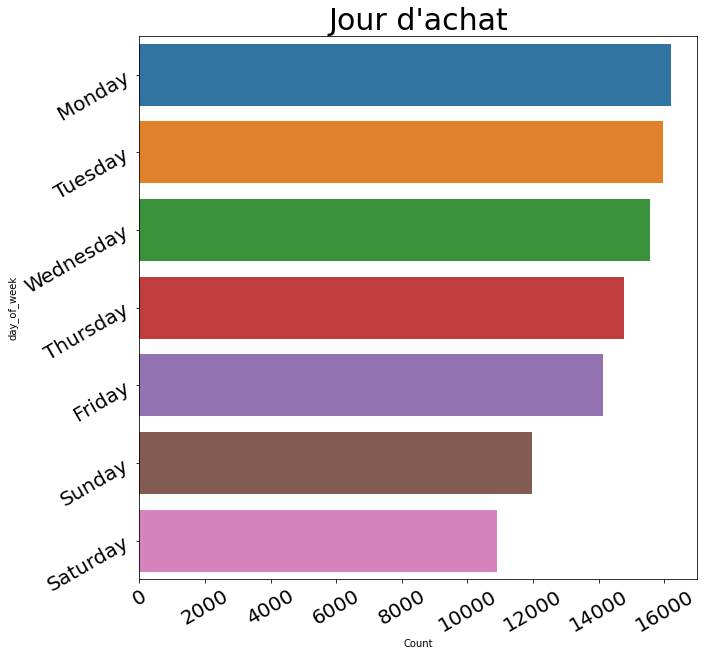

In [20]:
#14 - Date

m01_C = pd.DataFrame(data=mOTP["day_of_week"])
m01_C = m01_C.value_counts()
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.rename(columns={0 : 'Count'}) 
m01_C = m01_C.reset_index()
m01_C

mDay = m01_C.copy()
GraphNum(m01_C,"Count", "day_of_week", "Jour d'achat" )


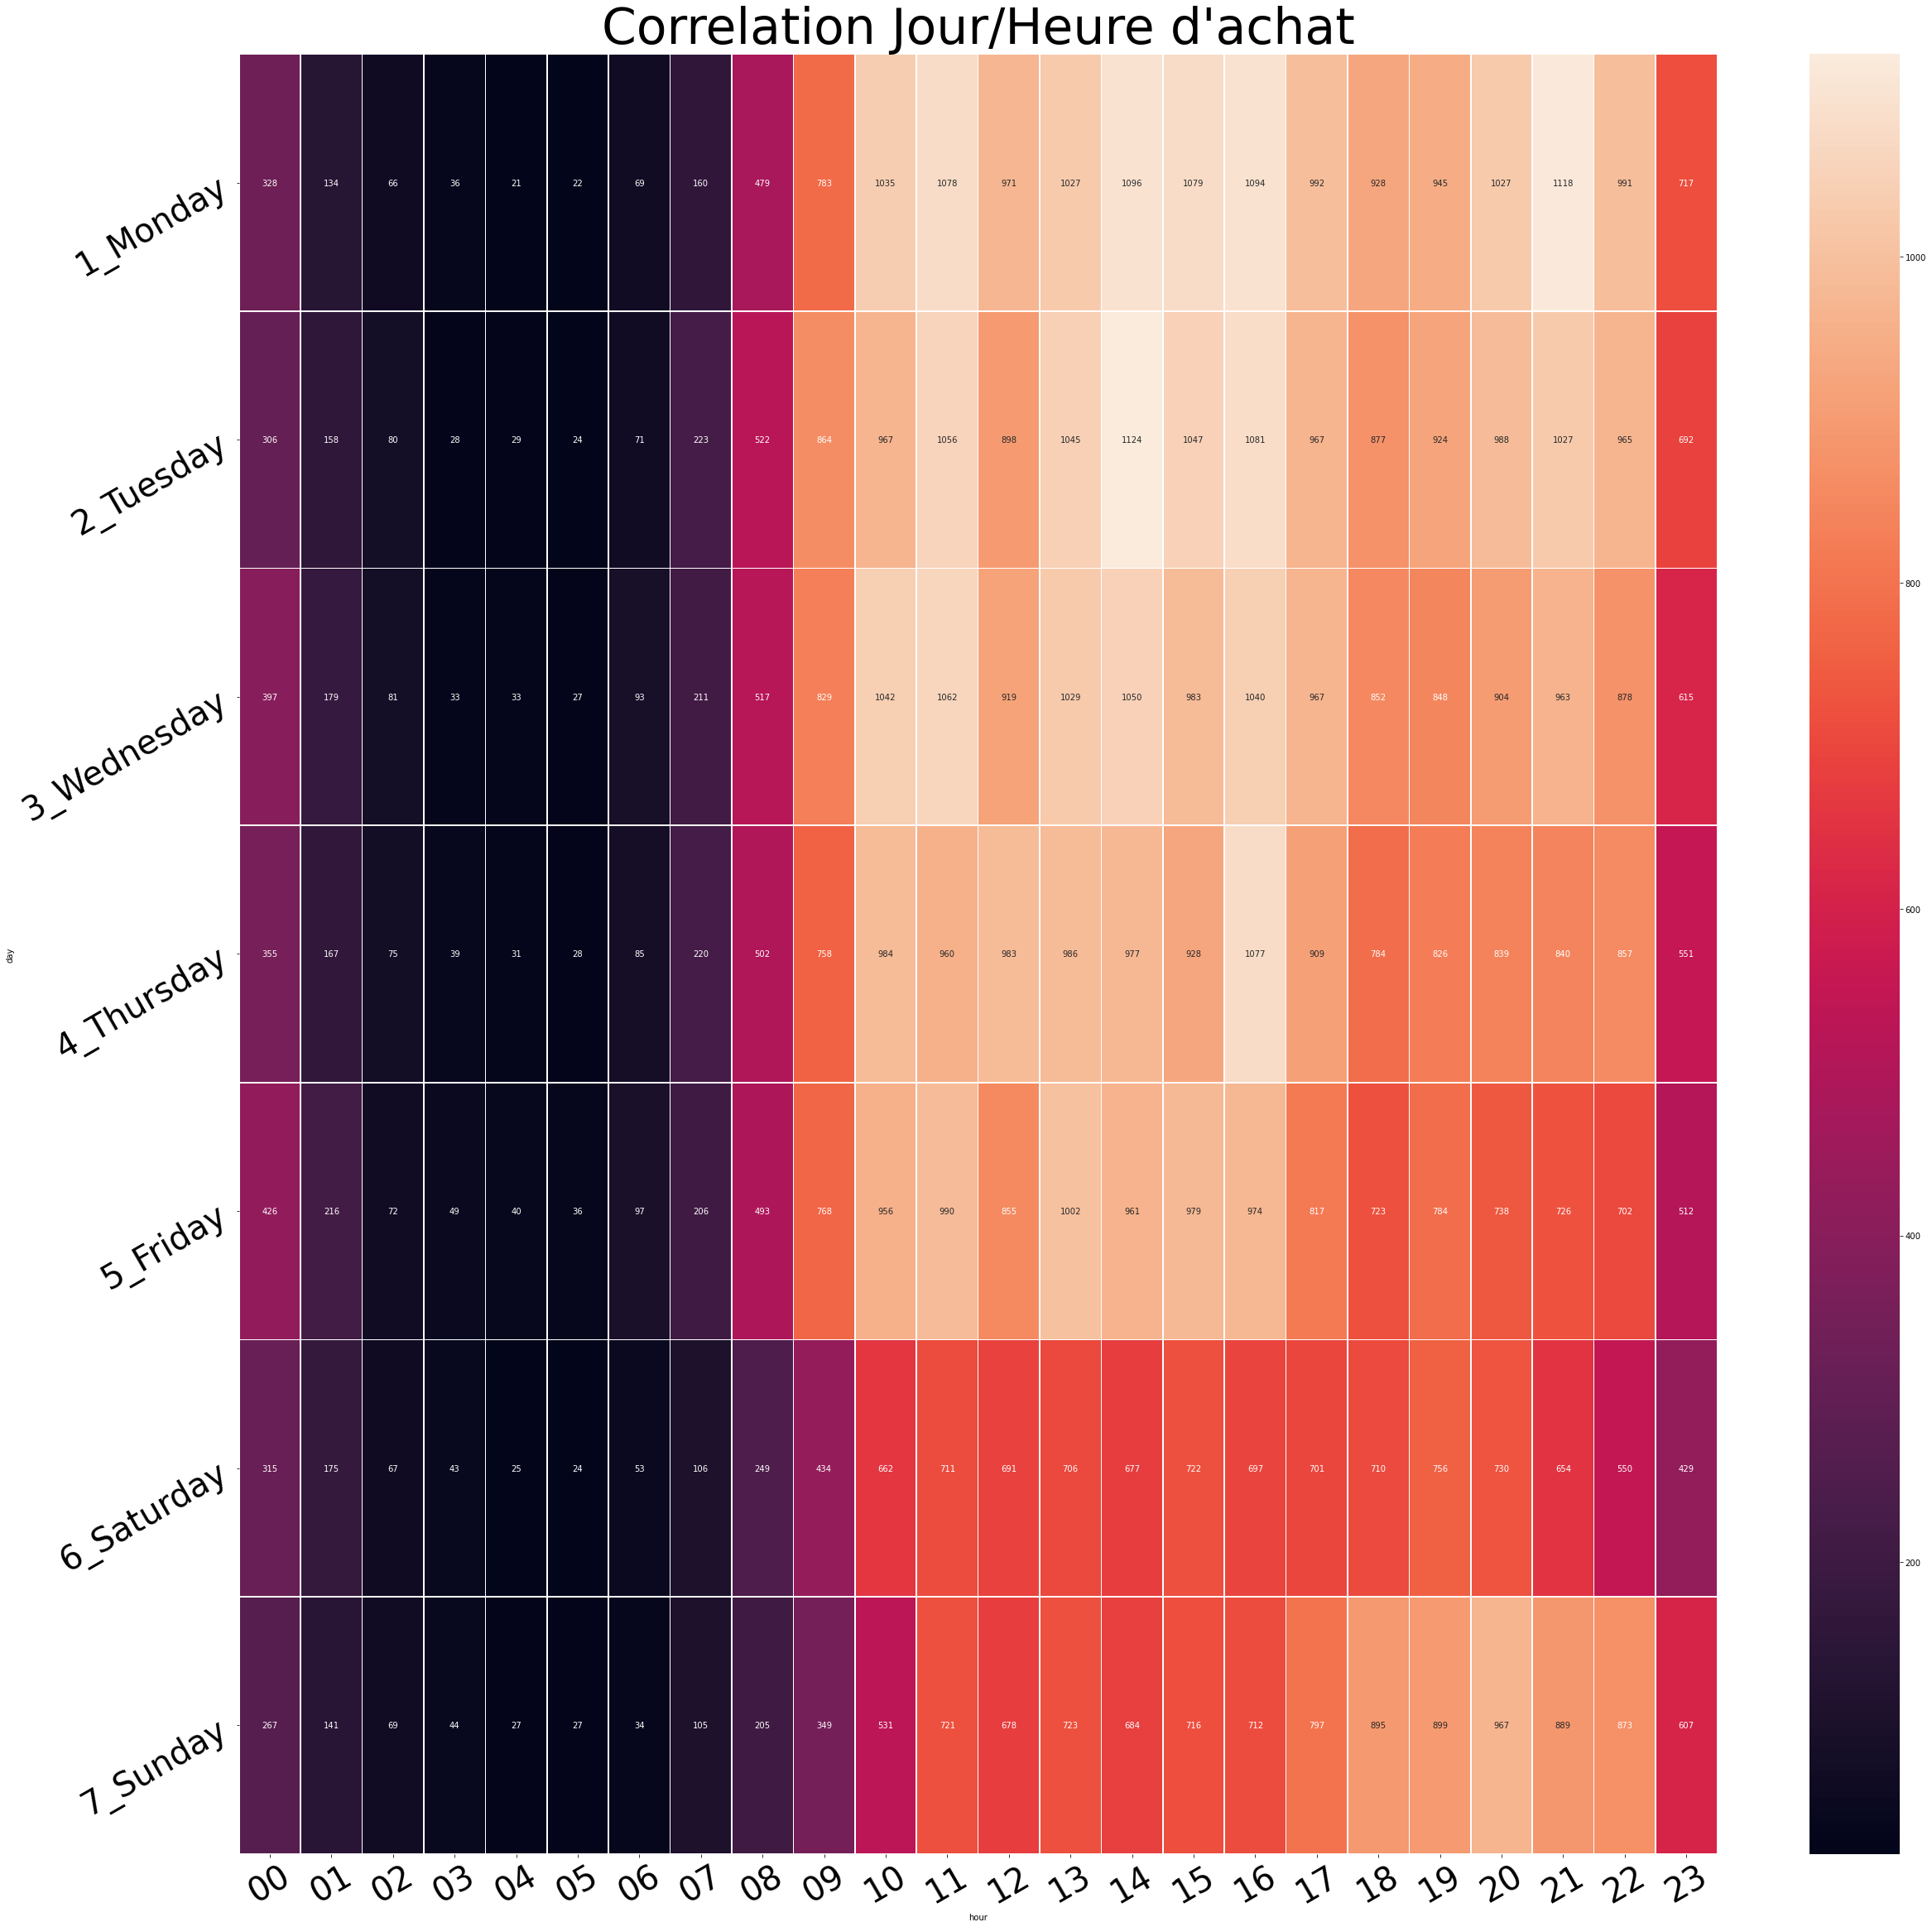

In [21]:
mOTP["space"] = "^"
mOTP["Concat"] = mOTP["day_of_week"].astype(str) + mOTP["space"].astype(str) + mOTP["Hour"].astype(str) 
mOTP = mOTP["Concat"].value_counts()
mOTP = pd.DataFrame(data=mOTP)
mOTP = mOTP.reset_index()
new = mOTP["index"].str.split("^", n = 1, expand = True)
mOTP["day"] = new[0]
mOTP["hour"] = new[1]
mOTP.drop('index', inplace=True, axis=1)

mOTP.replace("Monday", "1_Monday", inplace=True)
mOTP.replace("Tuesday", "2_Tuesday", inplace=True)
mOTP.replace("Wednesday", "3_Wednesday", inplace=True)
mOTP.replace("Thursday", "4_Thursday", inplace=True)
mOTP.replace("Friday", "5_Friday", inplace=True)
mOTP.replace("Saturday", "6_Saturday", inplace=True)
mOTP.replace("Sunday", "7_Sunday", inplace=True)
mOTP= mOTP.pivot("day", "hour", "Concat")
#mOTP["day"].reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(mOTP, annot=True, fmt="d", linewidths=.5)
plt.title("Correlation Jour/Heure d'achat", fontsize=60)
plt.xticks(fontsize=40, rotation=30)
plt.yticks(fontsize=40, rotation=30)
ax.set_facecolor('white')
#plt.savefig('HeatMap_Day_Hour.png')


In [22]:
ax.set_facecolor('white')

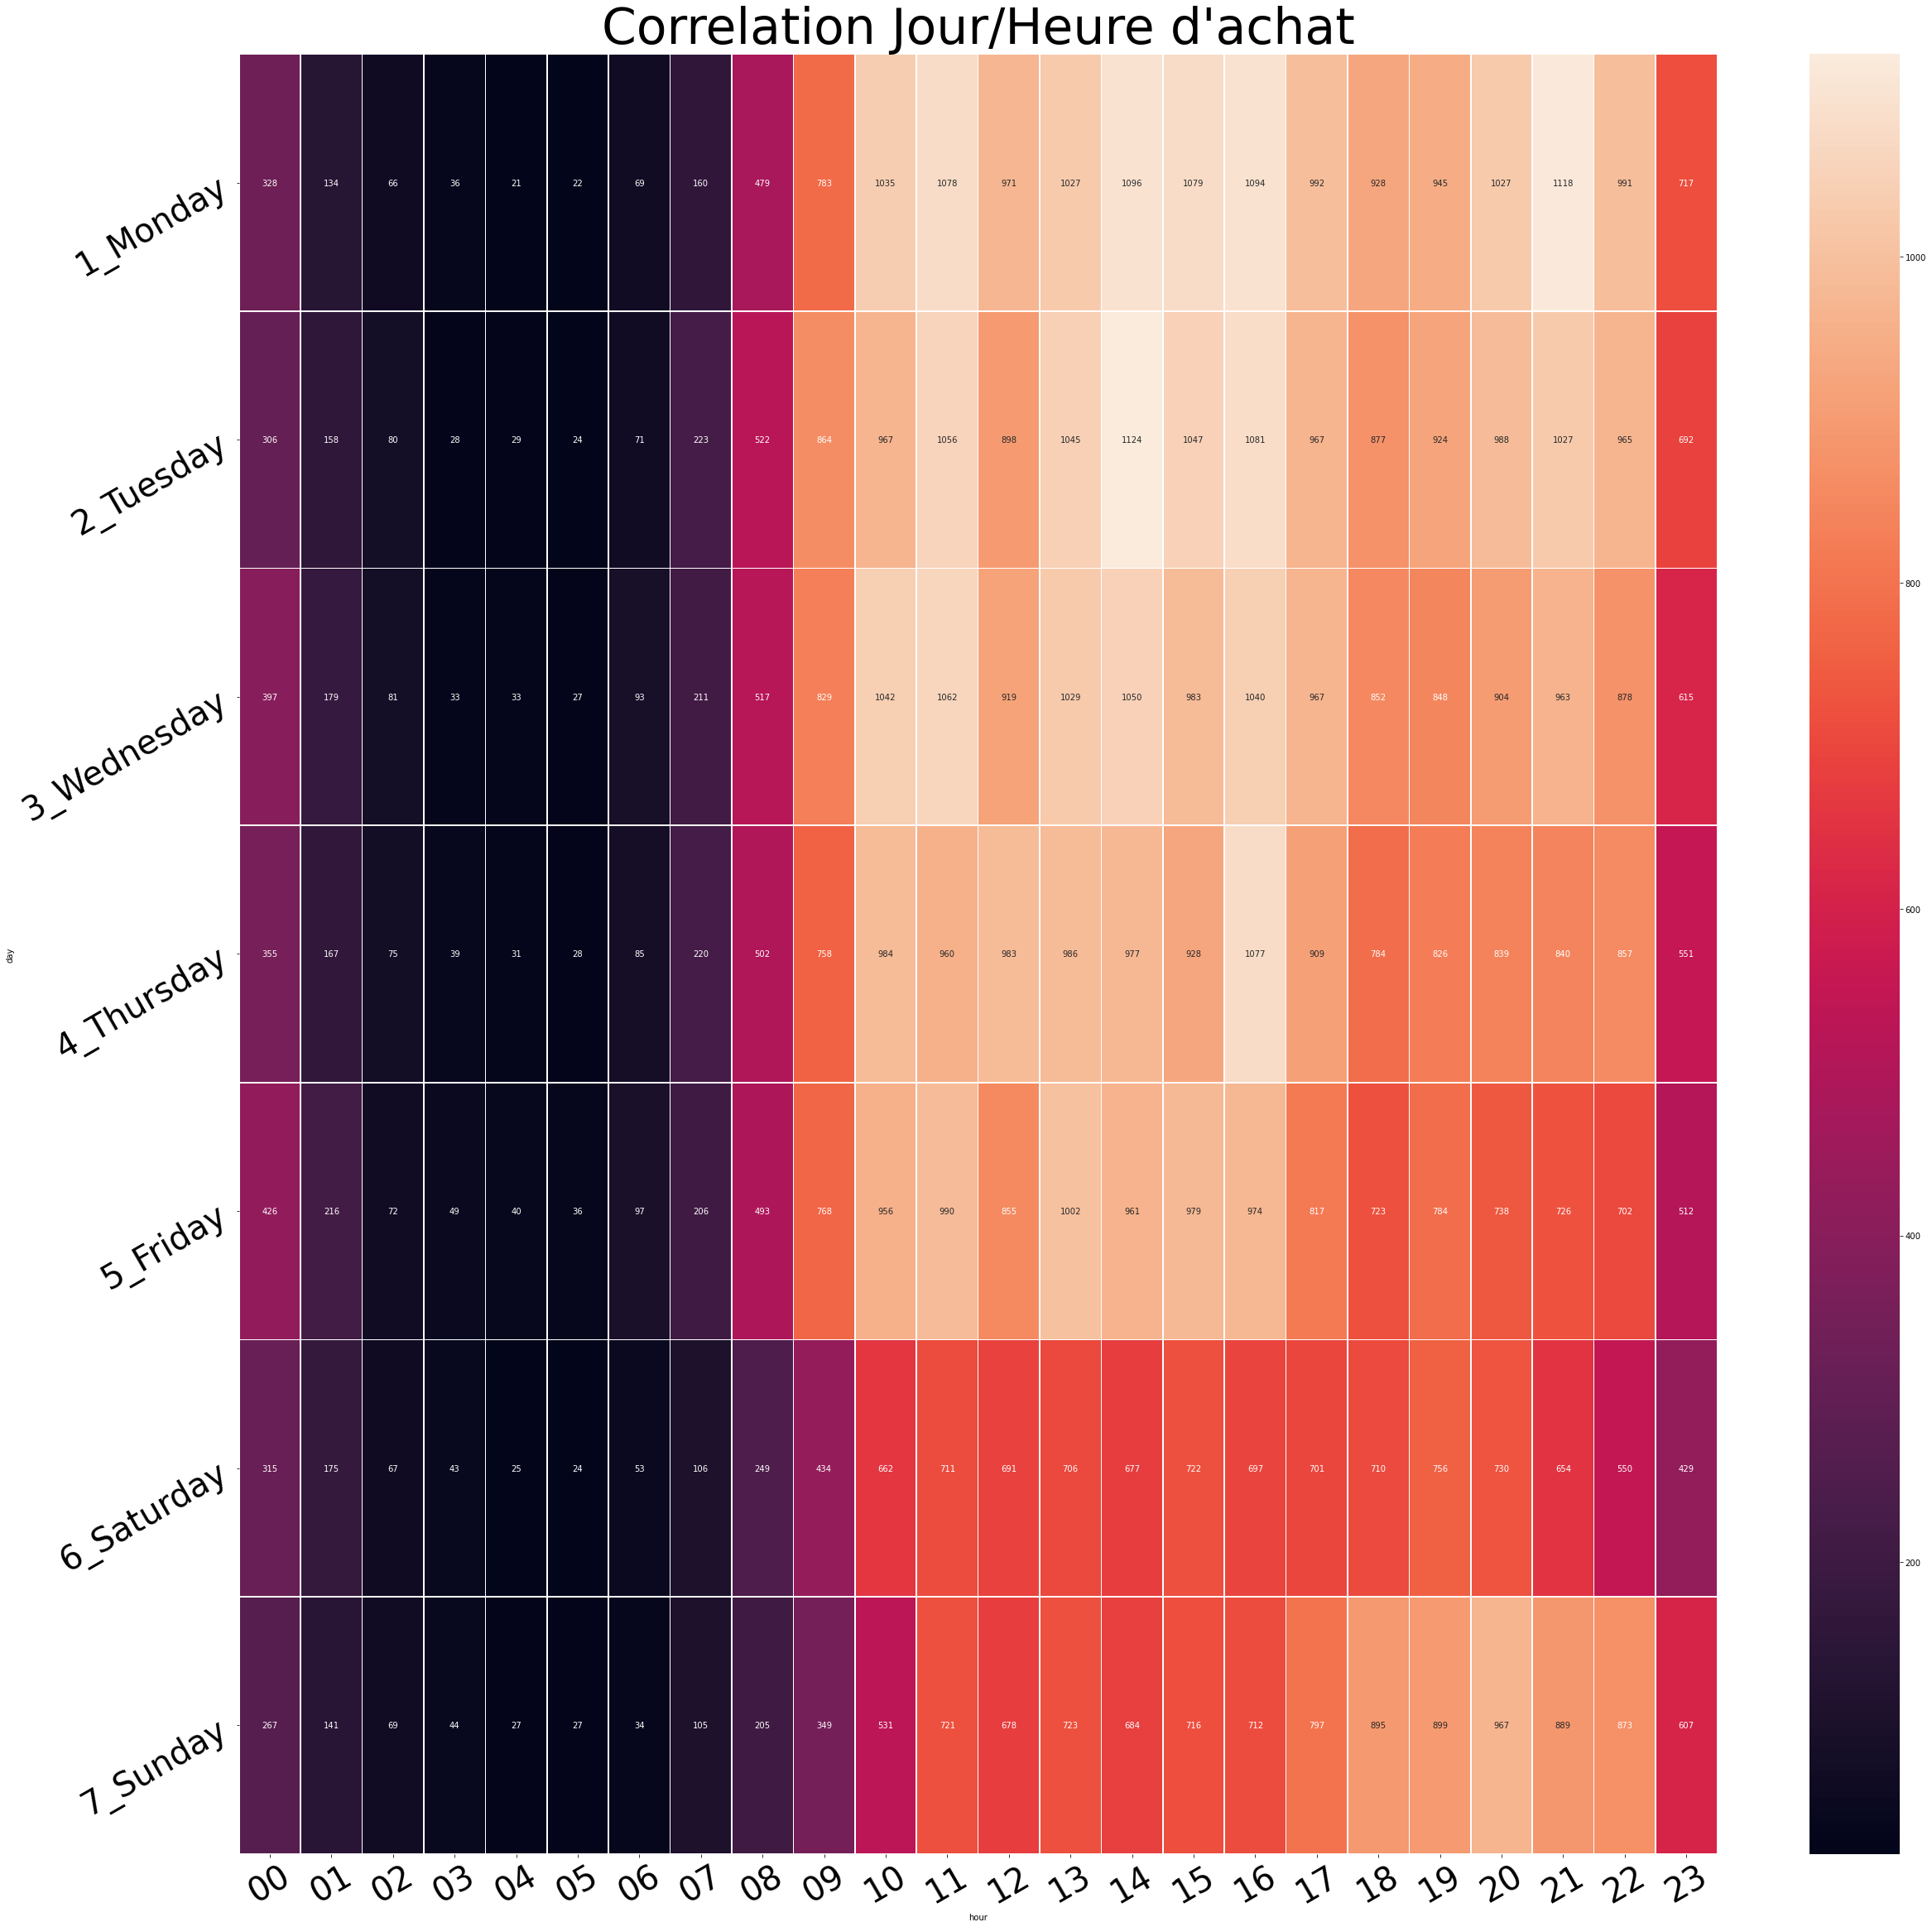

In [23]:
f, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(mOTP, annot=True, fmt="d", linewidths=.5)
plt.title("Correlation Jour/Heure d'achat", fontsize=60)
plt.xticks(fontsize=40, rotation=30)
plt.yticks(fontsize=40, rotation=30)
ax.set_facecolor('white')